<a href="https://colab.research.google.com/github/jeguns/EP7173/blob/main/Unidad%2001/01_Data_frames_particiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lista**

- Colección mutable, es decir es posible modificar sus elementos después de haberlas creado (se pueden agregar, eliminar o cambiar elementos).

- Se definen utilizando corchetes [].

- Ejemplos de lista:

In [ ]:
[3, 5, 2]

In [ ]:
L1 = [2, 0, -3]
type(L1)

In [ ]:
L2 = [2, 0, True, 'dat']
type(L2)

In [ ]:
print(L2[1])
print(L2[-1])
print(L2[1:])
print(L2[:1])

In [ ]:
L3 = [1, 3j, [3, 4], 5, 'M']
type(L3)

In [ ]:
print(L3[1])
print(L3[-1])
print(L3[1:])
print(L3[:1])
print(L3[2][1])

In [ ]:
L3.append('+1')
L3

In [ ]:
L3.insert(2, 3j)
L3

In [ ]:
L3.remove(3j)
L3

In [ ]:
L3.pop()
L3

In [ ]:
L3.pop(2)
L3

In [ ]:
L3.reverse()
L3

# **Tupla**

- Colección inmutable, lo que significa que una vez que se ha creado una tupla, no se pueden cambiar sus elementos.

- Se definen utilizando paréntesis () o simplemente separando elementos por comas.

- Acceder a los elementos de una tupla suele ser más rápido que en una lista, debido a su inmutabilidad.

- Ejemplos de tupla:

In [ ]:
(3, 5, 2)

In [ ]:
T1 = (2, 0, -3)
type(T1)

In [ ]:
T2 = (2, 0, True, 'dat')
type(T2)

In [ ]:
print(T2[1])
print(T2[-1])
print(T2[1:])
print(T2[:1])

In [ ]:
T3 = (1, 3j, [3, 4], 5, 'M')
type(T3)

In [ ]:
print(T3[1])
print(T3[-1])
print(T3[1:])
print(T3[:1])
print(T3[2][1])

In [ ]:
T3.count(5)

In [ ]:
T3.index(5)

# **Lectura de datos**

Verifique previamente que ha subido el archivo de datos (**01 - admitidos.csv**) en el panel del lado izquierdo.

In [ ]:
import pandas as pd

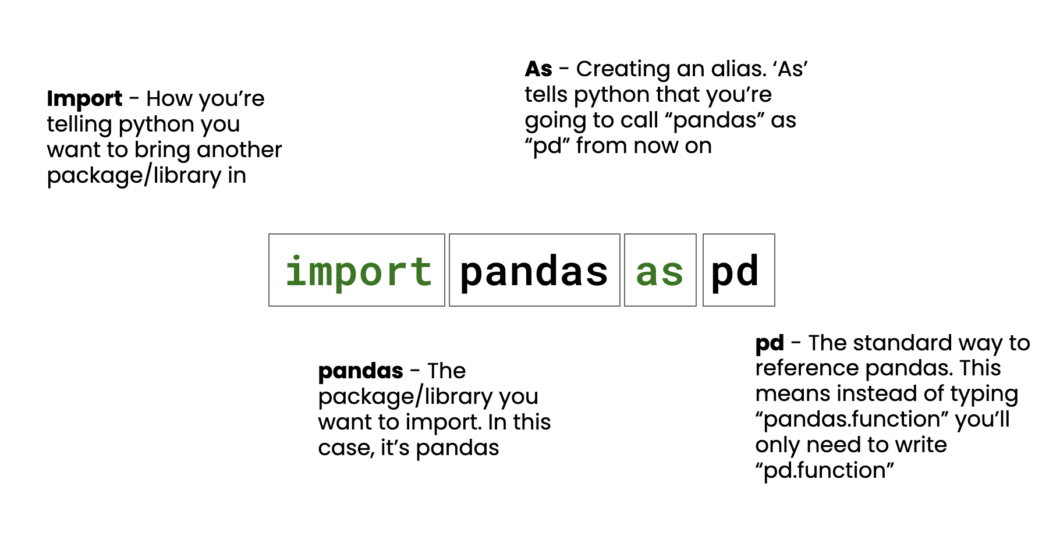

In [ ]:
datos = pd.read_csv("01 - admitidos.csv")

In [ ]:
datos

In [ ]:
datos.head(6) # Muestra las primeras 6 filas

In [ ]:
datos.tail(10) # Muestra las últimas 10 filas

In [ ]:
datos.admit # extrae la columna admit

In [ ]:
datos['admit']

In [ ]:
datos.loc[:,'admit']

In [ ]:
type(datos.loc[:,'admit'])

In [ ]:
datos[['admit']]

In [ ]:
type(datos[['admit']])

In [ ]:
datos.loc[:,['gpa','admit']] # extrae las columnas admit y gpa, de todas las filas

In [ ]:
datos[['admit','gpa']] # extrae las columnas admit y gpa

In [ ]:
datos.iloc[:,3] # extrae los valores de todas las filas, y la columna de posición 3

In [ ]:
datos.iloc[:,[0,3]] # extrae los valores de todas las filas, y la columna de posicion 3, como Data Frame

In [ ]:
datos.iloc[1] # selecciona la segunda fila como pandas Series

In [ ]:
datos.iloc[1,] # selecciona la segunda fila como pandas Series

In [ ]:
datos.iloc[0:4] # extrae la primera, segunda, tercera y cuarta fila (posiciones 0, 1, 2 y 3) como Data Frame

In [ ]:
datos.iloc[[3,7,1,12]] # extrae las filas de posiciones 3, 7, 1 y 12, como Data Frame

In [ ]:
datos.iloc[-1,] # extrae la última fila del DF

In [ ]:
datos.iloc[-3:,:] # extrae las últimas 3 filas, considerando todas las columnas

In [ ]:
datos.iloc[2,2] # tercera fila con tercera columna, porque las ubicaciones se cuentan desde cero

In [ ]:
datos.iloc[0,0]

In [ ]:
datos.iloc[-3:,0:2] # extrae las 3 últimas filas y las dos primeras columnas, como Data Frame

In [ ]:
datos.shape

In [ ]:
datos.columns

In [ ]:
datos.info() # nos informa acerca del tipo y cantidad de datos de cada variable

In [ ]:
datos.describe() #

# **Partición de datos**

In [ ]:
features = ['gre','gpa','rank'] # se define una lista con el nombre de 3 variables, y se le asigna el nombre de features
X = datos.loc[:, features] # se seleccionan las columnas indicadas en features y el resultado se almacena en X
y = datos.loc[:, 'admit'] # se selecciona la columna adnit y el resultado se almacena en y

In [ ]:
print("Matriz de predictoras", X, sep='\n')
print("--------------------------------------------------")
print("Variable respuesta", y, sep='\n')

In [ ]:
type(X)

In [ ]:
type(y)

In [ ]:
print(X.shape, y.shape)

In [ ]:
y.value_counts() # Realiza un conteo para cada valor de y // una tabla de frecuencias de y

In [ ]:
y.value_counts()/sum(y.value_counts()) # se obtienen las frecuencias relativas para cada clase

In [ ]:
import random # importa el paquete random
from sklearn.model_selection import train_test_split # importa la función train_test_split de sklearn

In [ ]:
train_test_split(X, y, random_state = 100, train_size = 0.80) # 80% de 400 = 320

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, train_size = 0.80)

In [ ]:
print(X_train.shape, y_train.shape)

In [ ]:
y_train.value_counts()/sum(y_train.value_counts())

In [ ]:
print(X_test.shape,y_test.shape)

In [ ]:
y_test.value_counts()/sum(y_test.value_counts())

## Validación cruzada *k* fold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Partición en datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, test_size = 0.20)

In [ ]:
# Configuración de la validación cruzada
cv = KFold(n_splits=5, random_state=1, shuffle=True)
cv

In [ ]:
for max_prof in range(1, 6): # para tunear el hiperparámetro de máxima profundidad
    print(f'Probando profundidad = {max_prof}')
    val_scores = []

    # División en k = 5 folds
    for train_index, val_index in cv.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        print(f'Dimensión de los datos de entrenamiento para X:{X_train_fold.shape}, para y: {y_train_fold.shape}')
        print(f'Dimensión de los datos de validación para X:{X_val_fold.shape}, para y: {y_val_fold.shape}')

        # Entrenamiento en cada training fold
        model = DecisionTreeClassifier(max_depth = max_prof)
        model.fit(X_train_fold, y_train_fold)

        # Validación en cada validation fold
        val_score = model.score(X_val_fold, y_val_fold)
        val_scores.append(val_score)

    # Cálculo del puntaje promedio de validación para cada valor de max_prof
    mean_val_score = sum(val_scores) / len(val_scores)
    print(f'Puntuación media de validación: {mean_val_score:.2f}')


In [ ]:
# Elección de la mejor profundidad
best_max_depth = 2
model = DecisionTreeClassifier(max_depth = best_max_depth)
model.fit(X_train, y_train)

In [ ]:
# Evaluación del modelo en el conjunto de prueba
test_score = model.score(X_test, y_test)
print(f'Test score: {test_score:.3f}')

## Validación cruzada dejando uno fuera

In [ ]:
from sklearn.model_selection import LeaveOneOut

In [ ]:
# Partición en datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, test_size = 0.20)

In [ ]:
# Configuración de LOOCV (320-fold)
loocv = LeaveOneOut()

In [ ]:
for max_prof in range(1, 6):
    print(f'Probando profundidad = {max_prof}')
    val_scores = []

    # División en k = n folds
    for train_index, val_index in loocv.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        print(f'Dimensión de los datos de entrenamiento para X:{X_train_fold.shape}, para y: {y_train_fold.shape}')
        print(f'Dimensión de los datos de validación para X:{X_val_fold.shape}, para y: {y_val_fold.shape}')

        # Entrenamiento en cada training fold
        model = DecisionTreeClassifier(max_depth = max_prof)
        model.fit(X_train_fold, y_train_fold)

        # Validación en cada validation fold
        val_score = model.score(X_val_fold, y_val_fold)
        val_scores.append(val_score)

    # Cálculo del puntaje promedio de validación para cada valor de max_prof
    mean_val_score = sum(val_scores) / len(val_scores)
    print(f'Puntuación media de validación: {mean_val_score:.2f}')

In [ ]:
# Elección de la mejor profundidad
best_max_depth = 2
model = DecisionTreeClassifier(max_depth=best_max_depth)
model.fit(X_train, y_train)

In [ ]:
# Evaluación del modelo en el conjunto de prueba o testing
test_score = model.score(X_test, y_test)
print(f'Test score: {test_score:.2f}')

## Validación cruzada *k*-fold repetida *m* veces

In [ ]:
from sklearn.model_selection import RepeatedKFold

In [ ]:
# Partición en datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Configuración de la Validación cruzada 5-fold repetida 4 veces
rkf = RepeatedKFold(n_splits=5, n_repeats=4)

In [ ]:
for max_prof in range(1, 6):
    print(f'Probando profundidad = {max_prof}')
    val_scores = []

    # División en k = 5 folds y n = 4 repeticiones
    for train_index, val_index in rkf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        print(f'Dimensión de los datos de entrenamiento para X:{X_train_fold.shape}, para y: {y_train_fold.shape}')
        print(f'Dimensión de los datos de validación para X:{X_val_fold.shape}, para y: {y_val_fold.shape}')

        # Entrenamiento en cada training fold
        model = DecisionTreeClassifier(max_depth = max_prof)
        model.fit(X_train_fold, y_train_fold)

        # Validación en cada validation fold
        val_score = model.score(X_val_fold, y_val_fold)
        val_scores.append(val_score)

    # Cálculo del puntaje promedio de validación para cada valor de max_prof
    mean_val_score = sum(val_scores) / len(val_scores)
    print(f'Puntuación media de validación: {mean_val_score:.5f}')

In [ ]:
# Elección de la mejor profundidad = mejor accuracy (o en general, el mejor indicador)
best_max_depth = 2
model = DecisionTreeClassifier(max_depth=best_max_depth)
model.fit(X_train, y_train)

In [ ]:
# Evaluación del modelo en el conjunto de prueba
test_score = model.score(X_test, y_test)
print(f'Test score: {test_score:.2f}')